INFO6105 Instructor: Dr. Handan Liu

Homework 4

Grading: total 100 points


In [10]:
# Required Packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
# import iris data to model Svm classifier (3 points)
from sklearn.datasets import load_iris
iris= load_iris()


In [3]:
from sklearn import datasets   
iris_dataset = datasets.load_iris()


In [28]:
# Using the DESCR key (description) over the iris_dataset to describ the dataset (3 points)
print ("Iris data set Description : ", iris_dataset['DESCR'])

Iris data set Description :  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== =

In [32]:
# To get the iris features and the target classes (3 points)
print ("Iris feature data :: ", iris_dataset['data'])
print(iris_dataset.target_names)

Iris feature data ::  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2

In [30]:
# To check the target data (3 points)

print("Iris target :: ", iris_dataset['target'])

Iris target ::  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


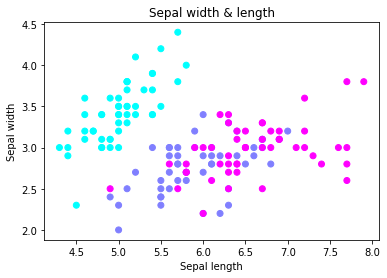

In [5]:

# Visualizing the relationship between sepal and target classes

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width & length')
plt.show()



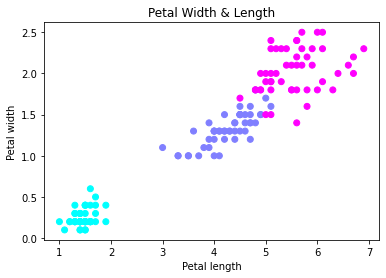

In [7]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal width & length')
plt.show()

In [17]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
C = 1.0 

svc= svm.SVC(kernel='linear', C=C).fit(X, y)
         
linear_svc=svm.LinearSVC(C=C, max_iter=10000).fit(X, y)
         
rbf=svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
         
poly=svm.SVC(kernel='poly', degree=3, gamma='auto', C=C).fit(X, y)


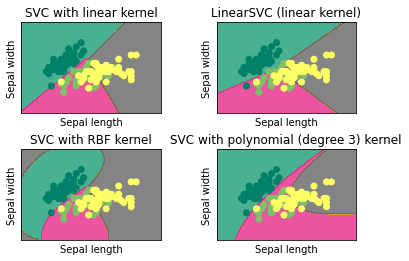

In [37]:
h = .02  
 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


titles = ['SVC with linear kernel',
       'LinearSVC (linear kernel)',
        'SVC with RBF kernel',
        'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, linear_svc, rbf, poly)):
    
     plt.subplot(2, 2, i + 1)
     plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 

     Z = Z.reshape(xx.shape)
     plt.contourf(xx, yy, Z, cmap=plt.cm.Dark2, alpha=0.8)
 

     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.summer)
     plt.xlabel('Sepal length')
     plt.ylabel('Sepal width')
     plt.xlim(xx.min(), xx.max())
     plt.ylim(yy.min(), yy.max())
     plt.xticks(())
     plt.yticks(())
     plt.title(titles[i])
 
plt.show()


In [26]:
from sklearn.metrics import accuracy_score
X1 = iris.data[:, [0, 1]]
y1 = iris.target

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)


from sklearn.svm import SVC
modelSVC = SVC(kernel='linear',gamma=10,random_state=0,degree=3)
modelSVC.fit(X_train1,y_train1)
Linear_pred = modelSVC.predict(X_test1)
Linear_pred
pred = accuracy_score(y_test1,Linear_pred)
print("Linear kernel accuracy score for sepal feature is:",pred)


from sklearn.svm import SVC
modelSVC = SVC(kernel='rbf',gamma=10,random_state=0,degree=3)


from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)
modelSVC.fit(X_train1,y_train1)
Rbf_pred = modelSVC.predict(X_test1)
Rbf_pred
pred = accuracy_score(y_test1,Rbf_pred)
print("Rbf kernel accuracy score for sepal feature is::",pred)

from sklearn.svm import SVC
modelSVC = SVC(kernel='poly',gamma=10,random_state=0,degree=3)

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)
modelSVC.fit(X_train1,y_train1)
Poly_pred = modelSVC.predict(X_test1)
Poly_pred
pred = accuracy_score(y_test1,Poly_pred)
print("Poly kernel accuracy score for sepal feature is:",pred)

Linear kernel accuracy score for sepal feature is: 0.8222222222222222
Rbf kernel accuracy score for sepal feature is:: 0.7555555555555555
Poly kernel accuracy score for sepal feature is: 0.7555555555555555


In [42]:
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
Z = iris.data[:, [2, 3]]
w = iris.target
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc_petal = svm.SVC(kernel='linear', C=C).fit(Z, w)
lin_petal=svm.LinearSVC(C=C, max_iter=10000).fit(Z, w)
rbf_petal=svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(Z, w)
poly_petal=svm.SVC(kernel='poly', degree=3, gamma='auto', C=C).fit(Z, w)

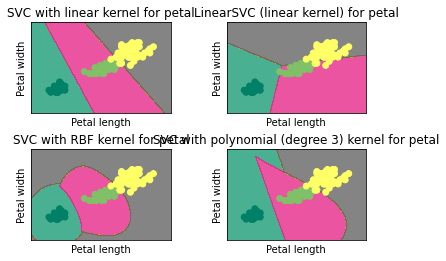

In [43]:
h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = Z[:, 0].min() - 1, Z[:, 0].max() + 1
y_min, y_max = Z[:, 1].min() - 1, Z[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel for petal',
       'LinearSVC (linear kernel) for petal',
        'SVC with RBF kernel for petal',
        'SVC with polynomial (degree 3) kernel for petal']
 
 
for i, clf in enumerate((svc_petal, lin_petal, rbf_petal, poly_petal)):
     # Plot the decision boundary. For that, we will assign a color to each
     # point in the mesh [x_min, x_max]x[y_min, y_max].
     plt.subplot(2, 2, i + 1)
     plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
     R = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
     # Put the result into a color plot
     R = R.reshape(xx.shape)
     plt.contourf(xx, yy, R, cmap=plt.cm.Dark2, alpha=0.8)
 
     # Plot also the training points
     plt.scatter(Z[:, 0], Z[:, 1], c=w, cmap=plt.cm.summer)
     plt.xlabel('Petal length')
     plt.ylabel('Petal width')
     plt.xlim(xx.min(), xx.max())
     plt.ylim(yy.min(), yy.max())
     plt.xticks(())
     plt.yticks(())
     plt.title(titles[i])
 
plt.show()



In [45]:
from sklearn.metrics import accuracy_score
X1 = iris.data[:, [2, 3]]
y1 = iris.target


from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)


from sklearn.svm import SVC
modelSVC = SVC(kernel='linear',gamma=10,random_state=0,degree=3)
modelSVC.fit(X_train1,y_train1)
Linear_pred = modelSVC.predict(X_test1)
Linear_pred
pred = round(accuracy_score(y_test1,Linear_pred),4)
print("Linear kernel accuracy score for Iris Petal feature is:",pred)


from sklearn.svm import SVC
modelSVC = SVC(kernel='rbf',gamma=10,random_state=0,degree=3)


from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)
modelSVC.fit(X_train1,y_train1)
Rbf_pred = modelSVC.predict(X_test1)
Rbf_pred
pred = round(accuracy_score(y_test1,Rbf_pred),4)
print("Rbf kernel accuracy score for Iris Petal feature is:",pred)


from sklearn.svm import SVC
modelSVC = SVC(kernel='poly',gamma=10,random_state=0,degree=3)


from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)
modelSVC.fit(X_train1,y_train1)
Poly_pred = modelSVC.predict(X_test1)
Poly_pred
pred = round(accuracy_score(y_test1,Poly_pred),4)
print("Poly kernel accuracy score for Iris Petal feature is:",pred)

Linear kernel accuracy score for Iris Petal feature is: 0.9556
Rbf kernel accuracy score for Iris Petal feature is: 0.9333
Poly kernel accuracy score for Iris Petal feature is: 0.9556
